# Regression on Price Promotion data

## 1. Import Package and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = 'Offtake_regression_input/offtake_regression_train.csv'
df_train = pd.read_csv(train_path)

df_train.tail()

,date,sales_in,stores,pro,offtake
111,8/29/2022,52,7553,RSP,7.92
112,9/5/2022,120,7371,RSP,7.19
113,9/12/2022,73,6809,RSP,6.29
114,9/19/2022,93,6812,RSP,6.37
115,9/26/2022,129,7023,RSP,6.37


In [3]:
print(df_train.shape)

(116, 5)


### Basic datafram checking

In [4]:
df_train.columns 

Index(['date', 'sales_in', 'stores', 'pro', 'offtake'], dtype='object')

In [5]:
df_train.isnull().sum()

date        0
sales_in    0
stores      0
pro         0
offtake     0
dtype: int64

In [6]:
df_train = df_train.dropna()

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      116 non-null    object 
 1   sales_in  116 non-null    int64  
 2   stores    116 non-null    int64  
 3   pro       116 non-null    object 
 4   offtake   116 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.7+ KB


## 2. Deal with date

In [8]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['week_of_year'] = df_train['date'].dt.week

C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\2241832040.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train['week_of_year'] = df_train['date'].dt.week


In [9]:
df_train.head()

,date,sales_in,stores,pro,offtake,year,month,week_of_year
0,2020-07-13,4170,19336,RSP,5.52,2020,7,29
1,2020-07-20,35,21440,2for,8.24,2020,7,30
2,2020-07-27,256,24646,2for,11.91,2020,7,31
3,2020-08-03,756,23780,2for,11.18,2020,8,32
4,2020-08-10,452,23017,2for,10.28,2020,8,33


## 3. Deal with 'Pro'
The Promotion ('pro') are promotions in each time. uniques pro in our data was show below

again plot 'sales_in' and not line was perform better than before.

<AxesSubplot: xlabel='pro', ylabel='count'>

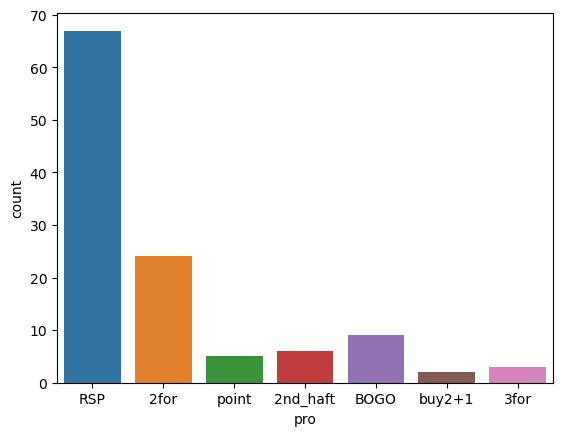

In [10]:
sns.countplot(x=df_train["pro"])

In [11]:
df_train['pro'].unique()

array(['RSP', '2for', 'point', '2nd_haft', 'BOGO', 'buy2+1', '3for'],
      dtype=object)

In [12]:
df_train = df_train[df_train['pro'].isin(['RSP', '2for', 'point', '2nd_haft','3for'])]

In [13]:
df_train['pro'].unique()

array(['RSP', '2for', 'point', '2nd_haft', '3for'], dtype=object)

in this section, author was decided to cut havvy promotion such as BOGO (Buy one ge one) and buy2+1 off and focus on the price discount promotion.( RSP is normal retail selling price, it mean no promotion) and next we were going to get dummy of 'Pro'

In [14]:
dummies = df_train[['pro']]
dummies_col = dummies.columns

In [15]:
df_train = pd.get_dummies(df_train, columns = dummies_col)
df_train = df_train[['date','year','month','week_of_year','sales_in','stores','pro_point',
         'pro_2for','pro_2nd_haft','pro_3for','pro_RSP','offtake']]
df_train.head()

,date,year,month,week_of_year,sales_in,stores,pro_point,pro_2for,pro_2nd_haft,pro_3for,pro_RSP,offtake
0,2020-07-13,2020,7,29,4170,19336,0,0,0,0,1,5.52
1,2020-07-20,2020,7,30,35,21440,0,1,0,0,0,8.24
2,2020-07-27,2020,7,31,256,24646,0,1,0,0,0,11.91
3,2020-08-03,2020,8,32,756,23780,0,1,0,0,0,11.18
4,2020-08-10,2020,8,33,452,23017,0,1,0,0,0,10.28


to prevent name confusing of pro_RSP back to RSP (no promotion)

In [16]:
df_train = df_train.rename(columns = {'pro_RSP' : 'RSP'})

now we complete df to afer deal with date, remove outlier and get dummy of categorical feature.

## 4. Visualization 

<AxesSubplot: xlabel='date', ylabel='offtake'>

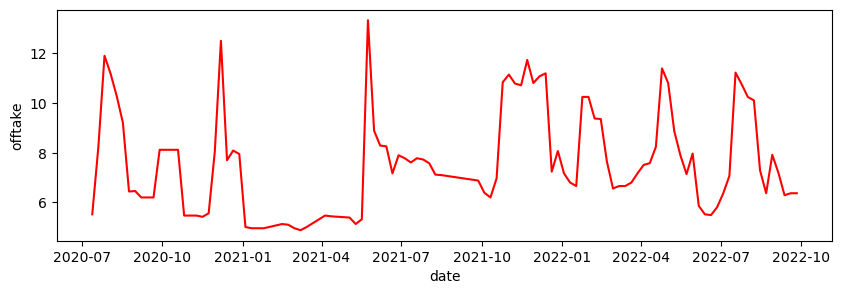

In [17]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.lineplot(data= df_train, x ='date', y= 'offtake', ax=ax, color='r')

<AxesSubplot: xlabel='date', ylabel='stores'>

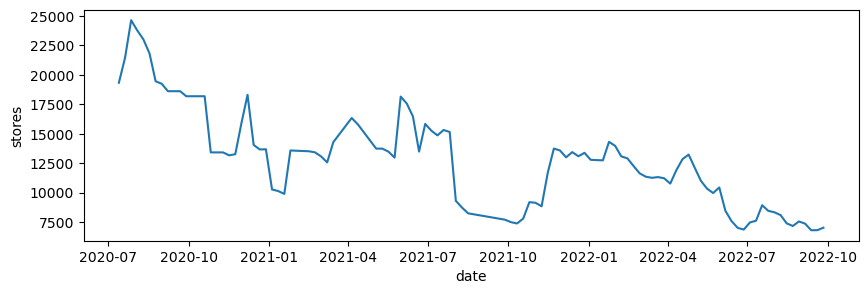

In [18]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.lineplot(data= df_train, x ='date', y= 'stores', ax=ax)

<AxesSubplot: xlabel='date', ylabel='sales_in'>

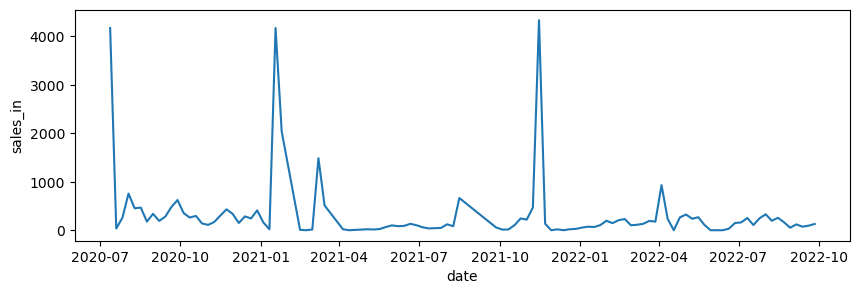

In [19]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.lineplot(data= df_train, x ='date', y= 'sales_in', ax=ax)

We can see aggresive peak of 'sales_in' at around 4000 - 4300, so author was decided to call those were outlier that need to remove. 

### remove outlier

In [20]:
df_train.sort_values(by ='sales_in', ascending=False)

,date,year,month,week_of_year,sales_in,stores,pro_point,pro_2for,pro_2nd_haft,pro_3for,RSP,offtake
70,2021-11-15,2021,11,46,4331,11679,0,1,0,0,0,10.72
0,2020-07-13,2020,7,29,4170,19336,0,0,0,0,1,5.52
27,2021-01-18,2021,1,3,4170,9893,0,0,0,0,1,4.96
28,2021-01-25,2021,1,4,2037,13582,0,0,0,0,1,4.96
34,2021-03-08,2021,3,10,1485,12571,0,0,0,0,1,4.88
...,...,...,...,...,...,...,...,...,...,...,...,...
98,2022-05-30,2022,5,22,0,10440,0,0,0,0,1,7.97
74,2021-12-13,2021,12,50,0,13443,0,0,0,0,1,11.20
32,2021-02-22,2021,2,8,0,13426,0,0,0,0,1,5.10
72,2021-11-29,2021,11,48,0,13582,0,0,0,0,1,10.81


In [21]:
outlier1 = df_train[(df_train['sales_in'] == 4331)].index
outlier2 = df_train[(df_train['sales_in'] == 4170)].index

In [22]:
df_train.drop(outlier1, inplace = True)

In [23]:
df_train.drop(outlier2, inplace = True)

In [24]:
df_train.sort_values(by ='sales_in', ascending=False)

,date,year,month,week_of_year,sales_in,stores,pro_point,pro_2for,pro_2nd_haft,pro_3for,RSP,offtake
28,2021-01-25,2021,1,4,2037,13582,0,0,0,0,1,4.96
34,2021-03-08,2021,3,10,1485,12571,0,0,0,0,1,4.88
90,2022-04-04,2022,4,14,931,10768,0,0,0,0,1,7.51
3,2020-08-03,2020,8,32,756,23780,0,1,0,0,0,11.18
57,2021-08-16,2021,8,33,664,8245,0,0,0,0,1,7.10
...,...,...,...,...,...,...,...,...,...,...,...,...
100,2022-06-13,2022,6,24,0,7587,0,0,0,0,1,5.52
99,2022-06-06,2022,6,23,0,8457,0,0,0,0,1,5.86
32,2021-02-22,2021,2,8,0,13426,0,0,0,0,1,5.10
98,2022-05-30,2022,5,22,0,10440,0,0,0,0,1,7.97


<AxesSubplot: xlabel='date', ylabel='sales_in'>

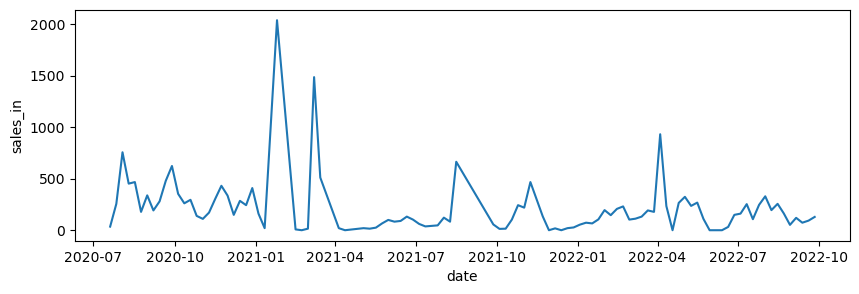

In [25]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.lineplot(data= df_train, x ='date', y= 'sales_in', ax=ax)

# Regression

## 1. Features correlation and selection

In [26]:
obs = df_train.shape[0]
types = df_train.dtypes
counts = df_train.apply(lambda x: x.count())
uniques = df_train.apply(lambda x: [x.unique()]).transpose()
nulls = df_train.apply(lambda x: x.isnull().sum())
distincts = df_train.apply(lambda x: x.unique().shape[0])
missing_ration = (df_train.isnull().sum()/ obs) * 100
skewness = df_train.skew()
kurtosis = df_train.kurt() 

C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\842999338.py:8: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df_train.skew()
C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\842999338.py:9: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df_train.kurt()


In [27]:
corr =df_train.corr()['offtake']
corr_col = 'corr '  + 'offtake'
str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
str.columns = cols
str.sort_values(by ='corr offtake', ascending=False)

C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\1776687423.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =df_train.corr()['offtake']


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr offtake
offtake,float64,102,74,0,0.0,"[8.24, 11.91, 11.18, 10.28, 9.21, 6.44, 6.46, ...",0.722809,-0.259838,1.000000
pro_2for,uint8,102,2,0,0.0,"[1, 0]",1.333433,-0.226791,0.577528
week_of_year,int64,102,53,0,0.0,"[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 4...",-0.145227,-1.039947,0.242340
month,int64,102,12,0,0.0,"[7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]",-0.168716,-1.023247,0.238697
pro_3for,uint8,102,2,0,0.0,"[0, 1]",5.653974,30.566489,0.212010
stores,int64,102,93,0,0.0,"[21440, 24646, 23780, 23017, 21822, 19460, 192...",0.584404,0.101559,0.202081
pro_2nd_haft,uint8,102,2,0,0.0,"[0, 1]",3.806204,12.736585,0.076686
year,int64,102,3,0,0.0,"[2020, 2021, 2022]",-0.262650,-1.287167,0.020451
pro_point,uint8,102,2,0,0.0,"[0, 1]",4.240116,16.297822,0.005354
sales_in,int64,102,75,0,0.0,"[35, 256, 756, 452, 467, 178, 338, 192, 280, 4...",3.929990,20.477590,-0.033772


In [28]:
df_corr = df_train.corr().abs()

C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\2377836558.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_train.corr().abs()


<AxesSubplot: >

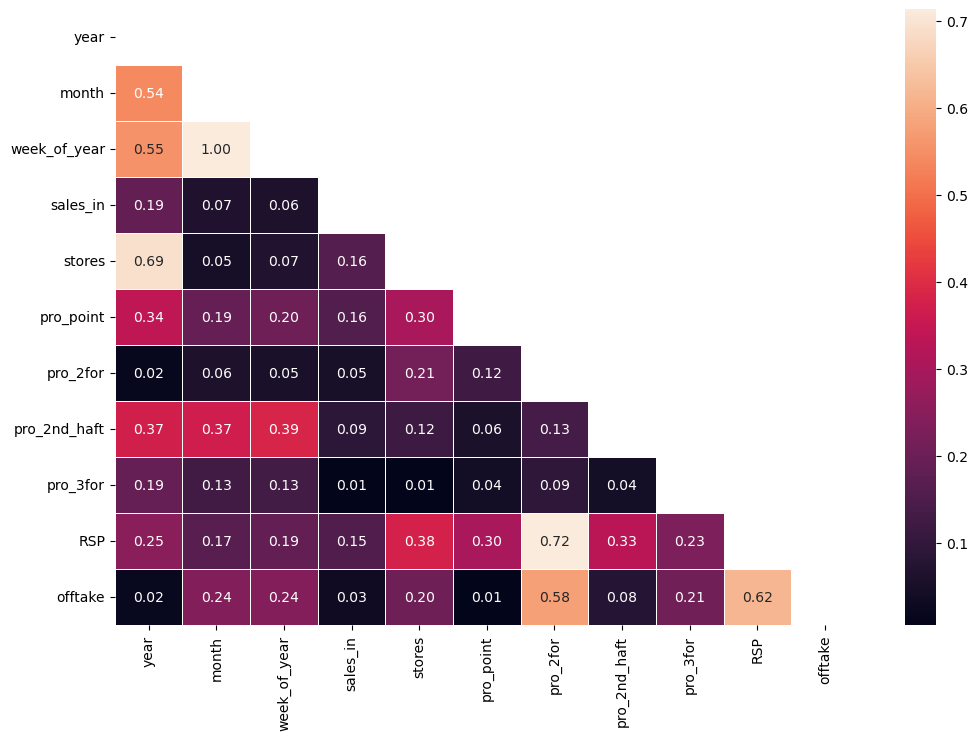

In [29]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, fmt=".2f", linewidths=.5, mask=mask, robust=True)

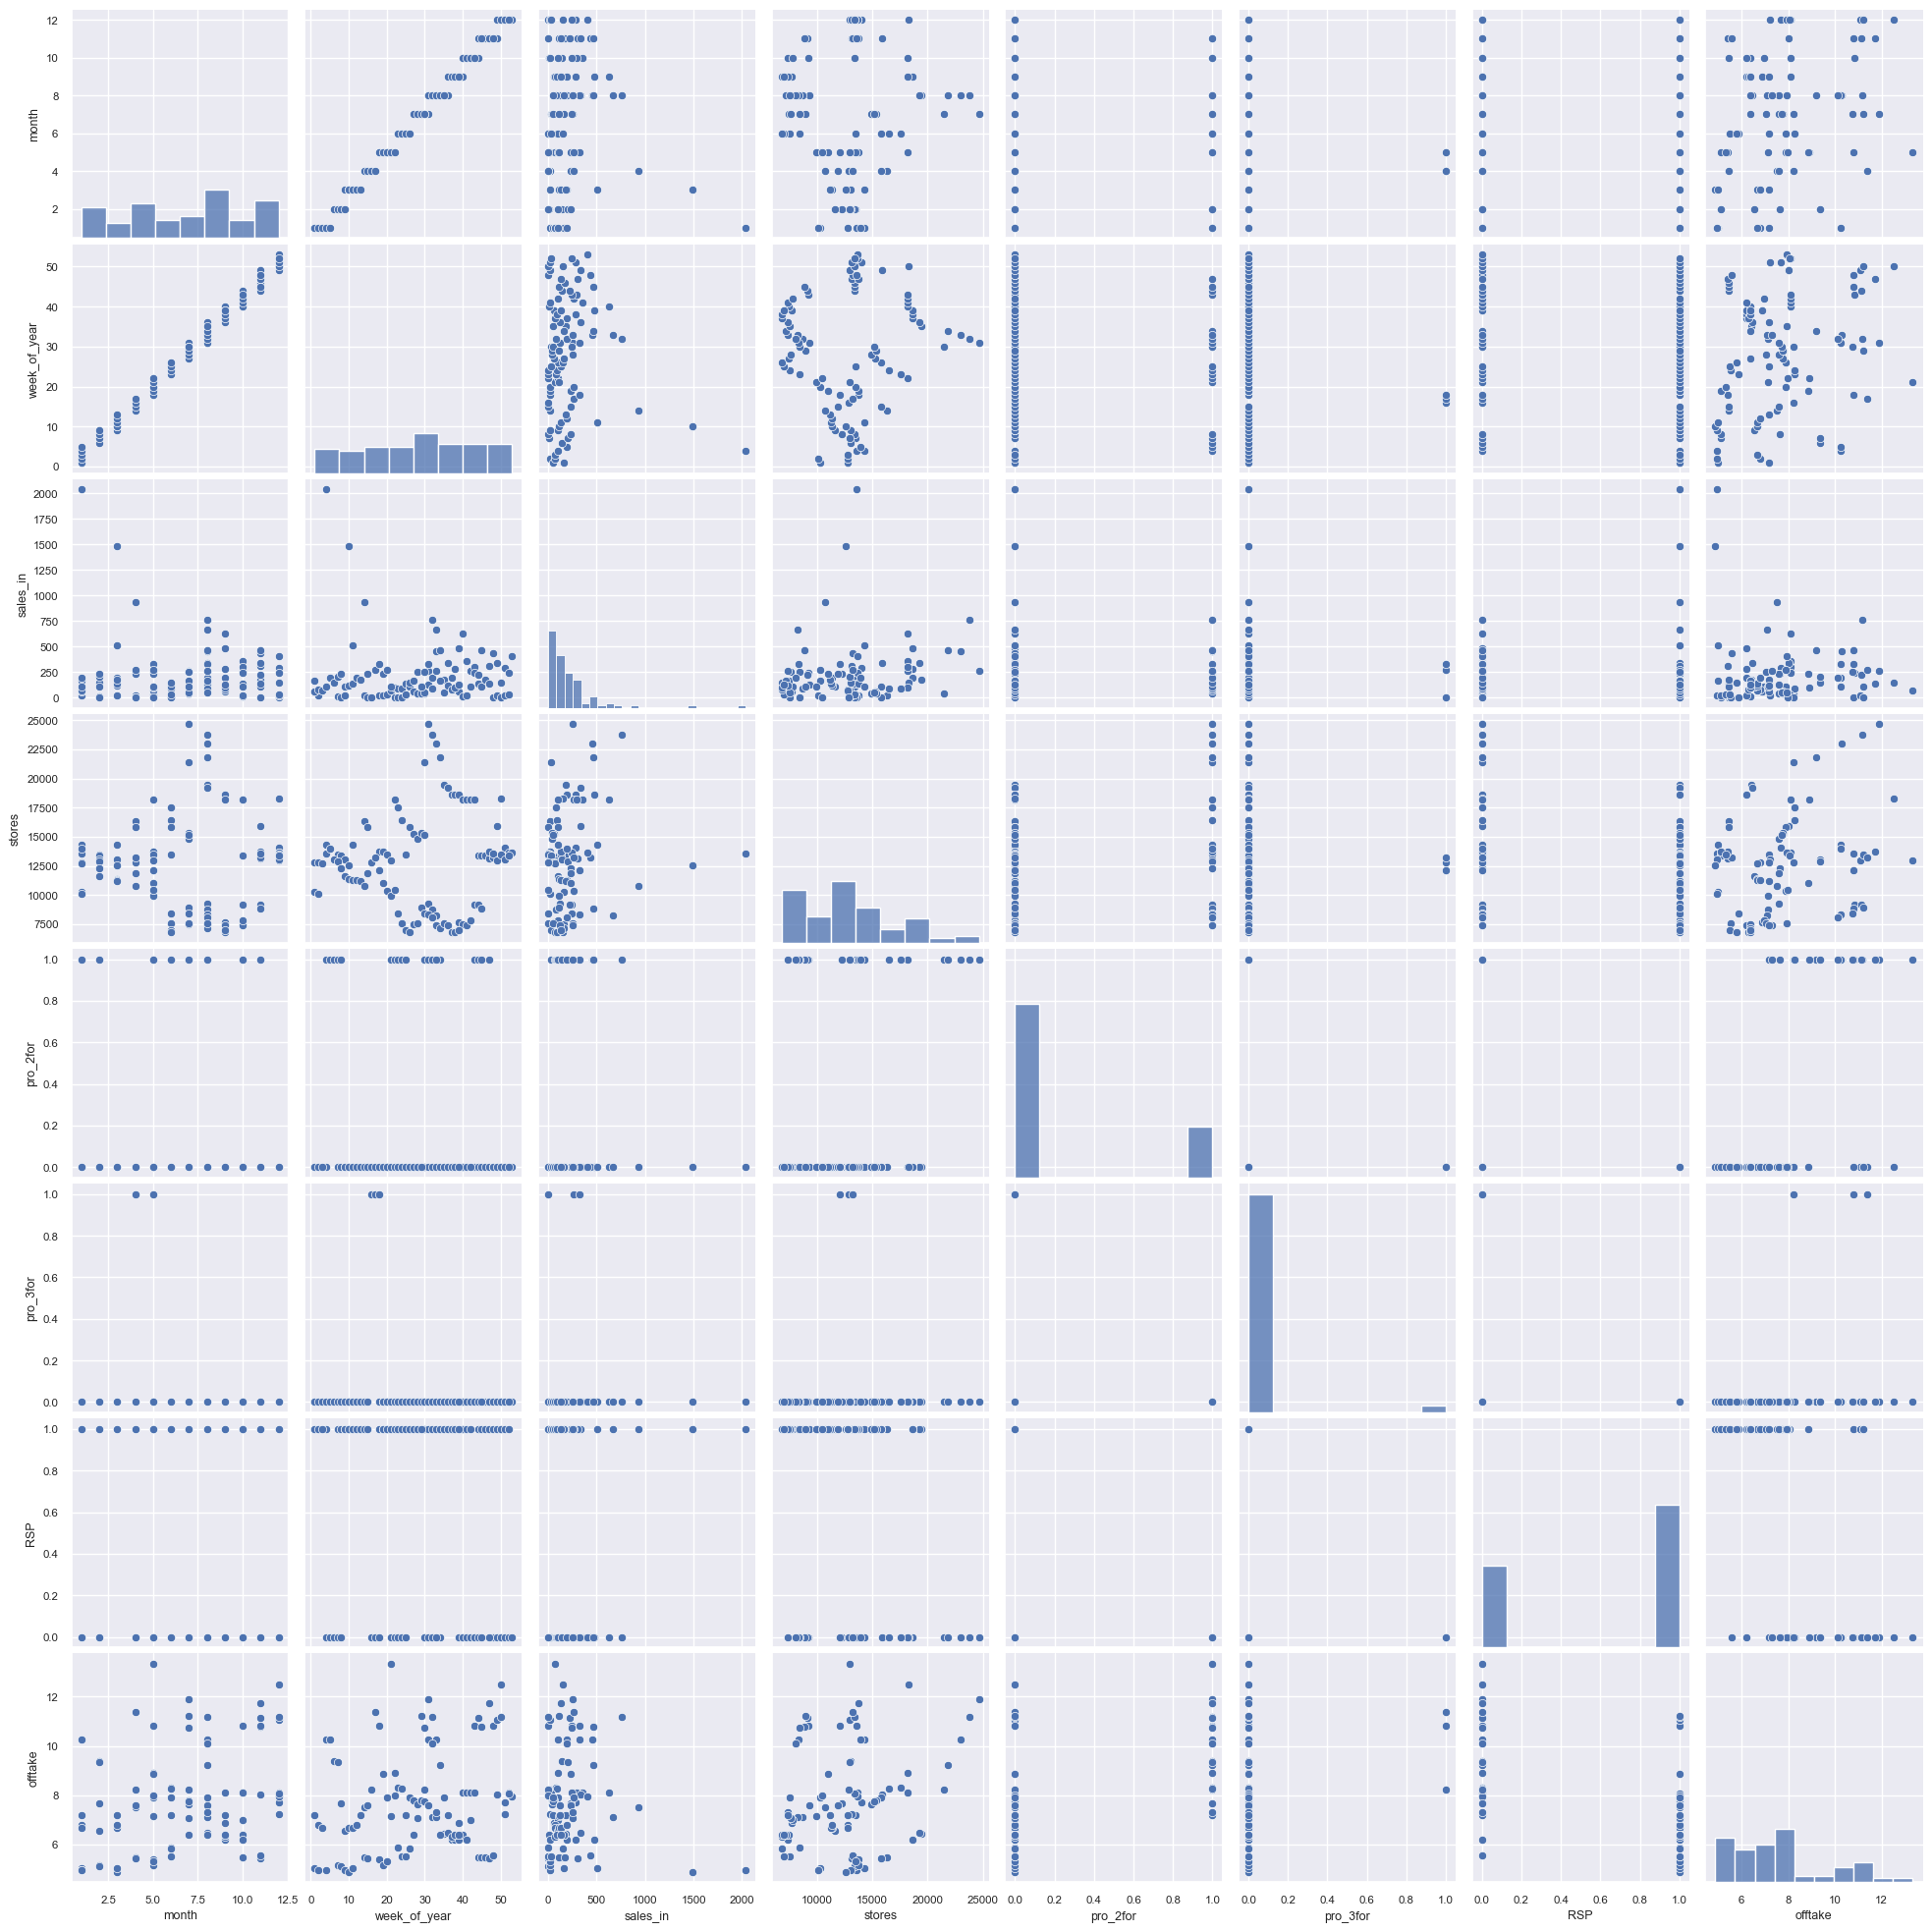

In [30]:
sns.set(font_scale=0.75)
g = sns.pairplot(df_train[['month', 'week_of_year','sales_in', 'stores','pro_2for','pro_3for','RSP', 'offtake']])

As heatmap it show correlation between each feature with the target (offtake) and double inspect with pairplot. In the end, Author set 0.2 as citeria to select freture 

In [31]:
features_columns = ['week_of_year','sales_in', 'stores','pro_2for','pro_3for','RSP']

## 2. Preprocessing

In [32]:
len(df_train)

102

In [33]:
train = df_train[:90]
valid = df_train[90:]

<AxesSubplot: xlabel='date', ylabel='offtake'>

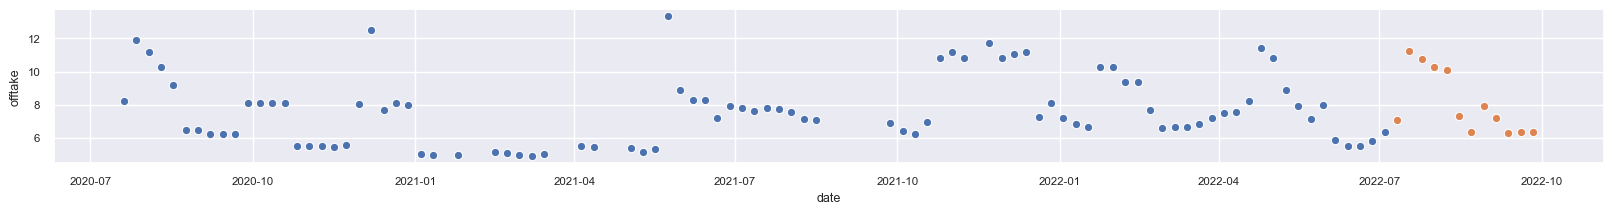

In [34]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='')

C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


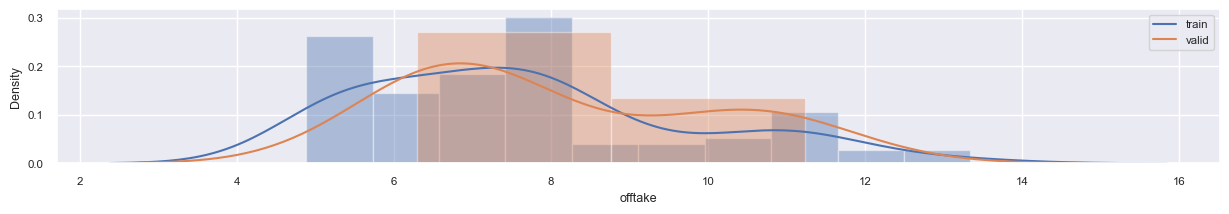

In [35]:
plt.figure(figsize=(15, 2));
sns.distplot(train["offtake"]);
sns.distplot(valid["offtake"]);
plt.legend(["train", "valid"])

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [37]:
norm = MinMaxScaler()
stand = StandardScaler()

In [38]:
X_trian = train[features_columns].values
X_val = valid[features_columns].values

y_train = train["offtake"].tolist()
y_val = valid["offtake"].tolist()

In [39]:
X_trian.shape, X_val.shape

((90, 6), (12, 6))

In [40]:
X_trian[0:5]

array([[   30,    35, 21440,     1,     0,     0],
       [   31,   256, 24646,     1,     0,     0],
       [   32,   756, 23780,     1,     0,     0],
       [   33,   452, 23017,     1,     0,     0],
       [   34,   467, 21822,     1,     0,     0]], dtype=int64)

In [41]:
X_train_norm = norm.fit_transform(X_trian)
X_train_std = stand.fit_transform(X_train_norm)

X_val_norm = norm.transform(X_val)
X_val_std = stand.transform(X_val_norm)

In [42]:
X_train_norm[0:5]

array([[0.55769231, 0.01718213, 0.81969518, 1.        , 0.        ,
        0.        ],
       [0.57692308, 0.12567501, 1.        , 1.        , 0.        ,
        0.        ],
       [0.59615385, 0.37113402, 0.95129633, 1.        , 0.        ,
        0.        ],
       [0.61538462, 0.22189494, 0.90838536, 1.        , 0.        ,
        0.        ],
       [0.63461538, 0.22925871, 0.84117879, 1.        , 0.        ,
        0.        ]])

In [43]:
X_train_std[0:5]

array([[ 0.1781027 , -0.60353234,  2.04129146,  1.93309133, -0.18569534,
        -1.31425748],
       [ 0.24326223,  0.13939737,  2.87034353,  1.93309133, -0.18569534,
        -1.31425748],
       [ 0.30842175,  1.82023383,  2.64640121,  1.93309133, -0.18569534,
        -1.31425748],
       [ 0.37358128,  0.79828526,  2.44909406,  1.93309133, -0.18569534,
        -1.31425748],
       [ 0.4387408 ,  0.84871035,  2.14007434,  1.93309133, -0.18569534,
        -1.31425748]])

C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


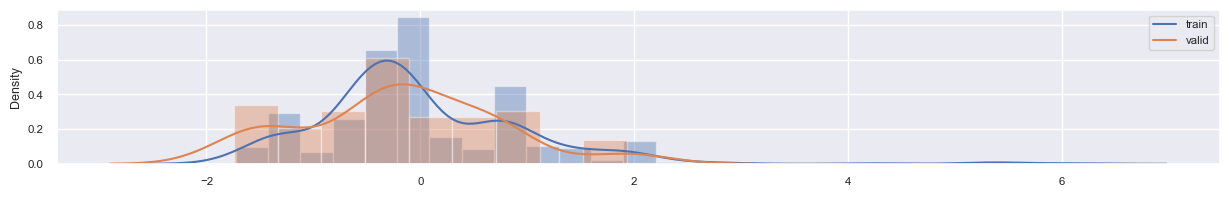

In [44]:
plt.figure(figsize=(15, 2));
sns.distplot(X_train_std);
sns.distplot(X_val_std);
plt.legend(["train", "valid"])

## 3. Modeling & Evaluation

### 3.1 baseline with **DecisionTreeRegressor**

In [45]:
from sklearn.tree import DecisionTreeRegressor
import sklearn
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {'max_depth': [5, 6, 7, 8, 9, 10, 11, 12]}

In [47]:
clf_tree = DecisionTreeRegressor(random_state=2022)

In [48]:
grid = GridSearchCV(estimator=clf_tree, 
                    param_grid=param_grid, 
                    scoring="neg_mean_squared_error", 
                    n_jobs=-1)

grid.fit(X_train_std, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=2022), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='neg_mean_squared_error')

In [49]:
print(grid.best_score_)
print(grid.best_estimator_.max_depth)

-5.4569188888888895
12


In [50]:
opt_clf_tree = DecisionTreeRegressor(max_depth=7, random_state=2022)
opt_clf_tree.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=7, random_state=2022)

In [51]:
y_train_opt_clf_tree = opt_clf_tree.predict(X_train_std)
y_val_opt_clf_tree = opt_clf_tree.predict(X_val_std)

In [52]:
print("R-Square Train: ", r2_score(y_train, y_train_opt_clf_tree))
print("R-Square Validation: ", r2_score(y_val, y_val_opt_clf_tree))
print("="*50)
print("MAE Train: ", mean_absolute_error(y_train, y_train_opt_clf_tree))
print("MAE Validation: ", mean_absolute_error(y_val, y_val_opt_clf_tree))
print("="*50)

R-Square Train:  0.988575126849683
R-Square Validation:  -0.21797447498157907
MAE Train:  0.07944045584045588
MAE Validation:  1.3724999999999998


In [53]:
train["baseline"] = y_train_opt_clf_tree
valid["baseline"] = y_val_opt_clf_tree

C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\1149549555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["baseline"] = y_train_opt_clf_tree
C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\1149549555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["baseline"] = y_val_opt_clf_tree


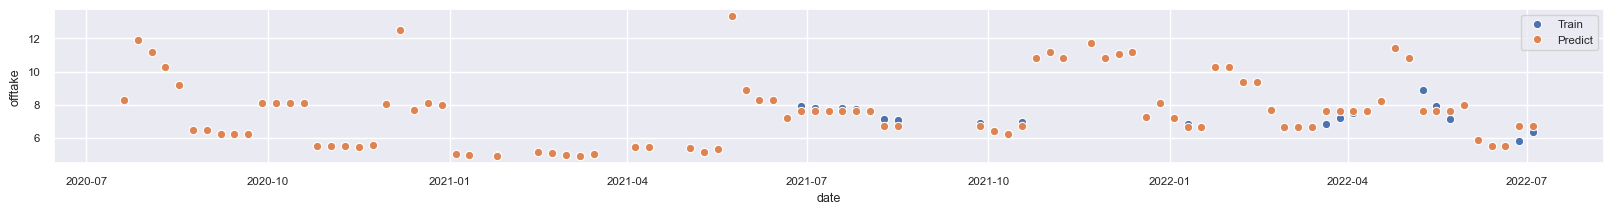

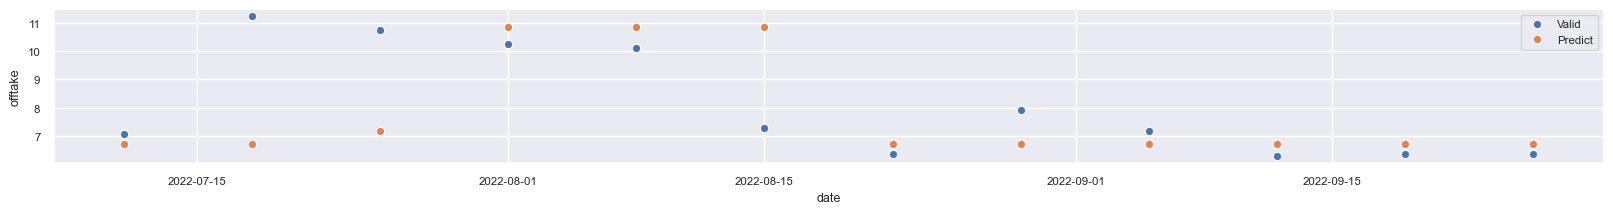

In [54]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=train, x="date", y="baseline", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=valid, x="date", y="baseline", marker='o', linestyle='')
plt.legend(["Valid", "Predict"])

### 3.2 baseline with DecisionTreeRegressor + **Validation** (Timeseriessplit)

In [55]:
from sklearn.model_selection import TimeSeriesSplit

In [56]:
tscv = TimeSeriesSplit(n_splits=5, test_size=10)

cv_ls = []
for train_index, valid_index in tscv.split(X_train_std):
    cv_ls.append((train_index, valid_index))

In [57]:
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=10)

In [58]:
cv_ls[0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]))

In [59]:
cv_ls[1]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]))

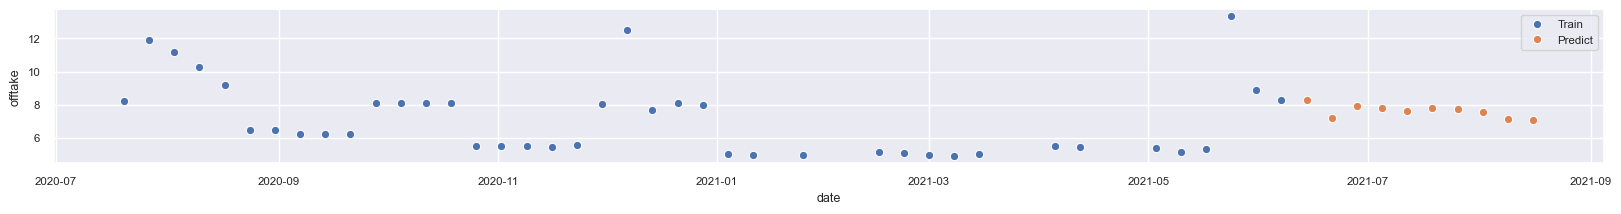

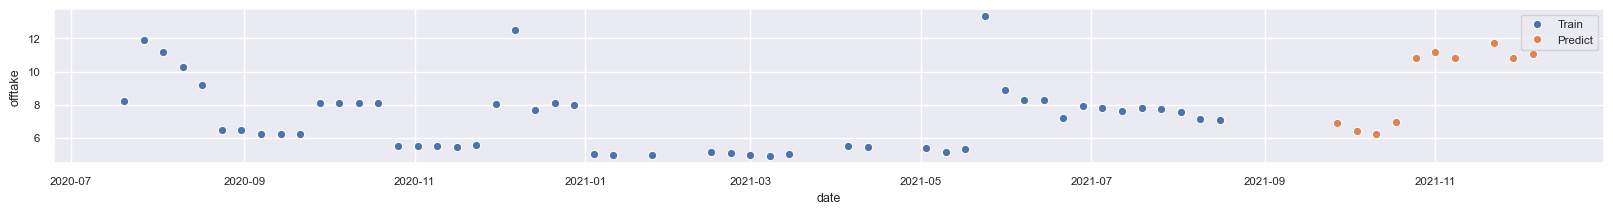

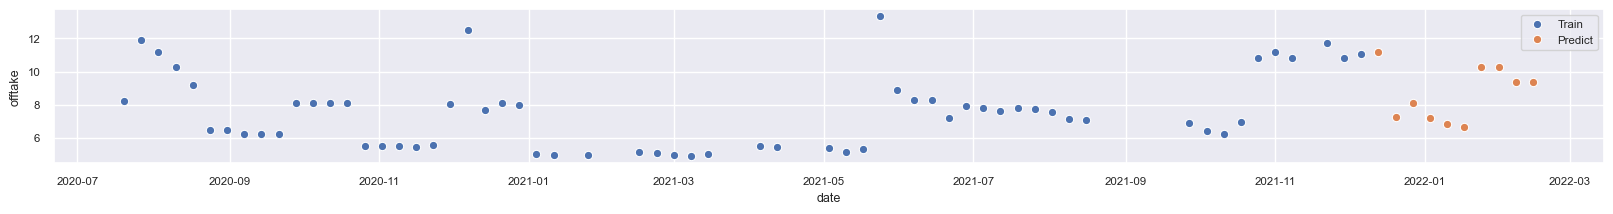

In [60]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train.iloc[cv_ls[0][0]], x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=train.iloc[cv_ls[0][1]], x="date", y="offtake", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=train.iloc[cv_ls[1][0]], x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=train.iloc[cv_ls[1][1]], x="date", y="offtake", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=train.iloc[cv_ls[2][0]], x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=train.iloc[cv_ls[2][1]], x="date", y="offtake", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

In [61]:
clf_tree = DecisionTreeRegressor(random_state=2022)

In [62]:
grid = GridSearchCV(estimator=clf_tree, 
                    param_grid=param_grid, 
                    scoring="neg_mean_squared_error", 
                    cv=cv_ls,
                    n_jobs=-1)

grid.fit(X_train_std, y_train)

GridSearchCV(cv=[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]),
                  array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49])),
                 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                  array([50, 51, 52, 53, 54, 5...
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
                  array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89]))],
             estimator=DecisionTreeRegressor(random_state=2022), n_jobs=-1,
             

In [63]:
print(grid.best_score_)
print(grid.best_estimator_.max_depth)

-6.320547111111112
9


In [64]:
opt_clf_tree = DecisionTreeRegressor(max_depth=8, random_state=2022)
opt_clf_tree.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=8, random_state=2022)

In [65]:
y_train_opt_clf_tree = opt_clf_tree.predict(X_train_std)
y_val_opt_clf_tree = opt_clf_tree.predict(X_val_std)

In [66]:
print("R-Square Train: ", r2_score(y_train, y_train_opt_clf_tree))
print("R-Square Validation: ", r2_score(y_val, y_val_opt_clf_tree))
print("="*50)
print("MAE Train: ", mean_absolute_error(y_train, y_train_opt_clf_tree))
print("MAE Validation: ", mean_absolute_error(y_val, y_val_opt_clf_tree))
print("="*50)

R-Square Train:  0.9944430602374831
R-Square Validation:  -0.39674425546708103
MAE Train:  0.04768686868686871
MAE Validation:  1.5270833333333336


In [67]:
train["validate"] = y_train_opt_clf_tree
valid["validate"] = y_val_opt_clf_tree

C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\2749808450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["validate"] = y_train_opt_clf_tree
C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\2749808450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["validate"] = y_val_opt_clf_tree


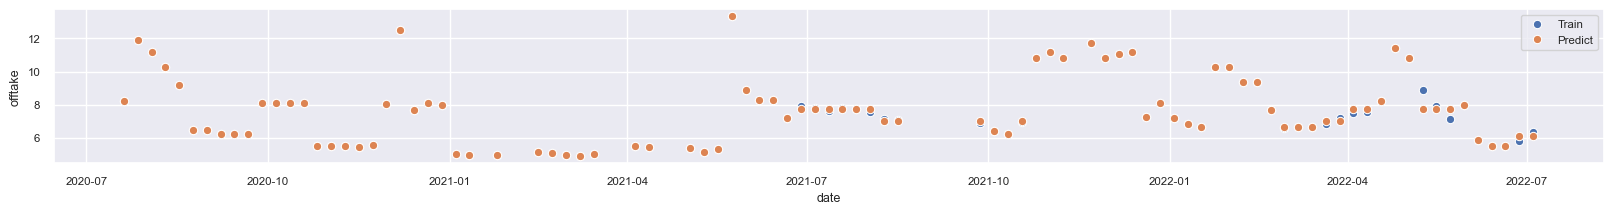

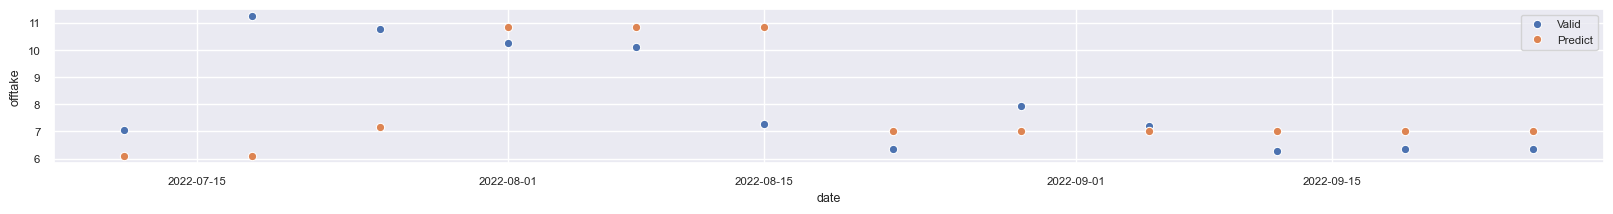

In [68]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=train, x="date", y="validate", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=valid, x="date", y="validate", marker='o', linestyle='')
plt.legend(["Valid", "Predict"])

### 3.3 baseline with DecisionTreeRegressor + Validation (Timeseriessplit) + **more param** 

In [69]:
clf_tree = DecisionTreeRegressor(random_state=2022)

In [70]:
param_grid = {'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'max_features': ["auto", "sqrt", "log2"]}

In [71]:
grid = GridSearchCV(estimator=clf_tree, 
                    param_grid=param_grid, 
                    scoring="neg_mean_squared_error", 
                    cv=cv_ls,
                    n_jobs=-1)

grid.fit(X_train_std, y_train)

GridSearchCV(cv=[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]),
                  array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49])),
                 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                  array([50, 51, 52, 53, 54, 5...
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
                  array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89]))],
             estimator=DecisionTreeRegressor(random_state=2022), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                     

In [72]:
print(grid.best_score_)
print(grid.best_estimator_)

-4.201001249444445
DecisionTreeRegressor(max_depth=6, max_features='sqrt', min_samples_split=7,
                      random_state=2022)


In [73]:
opt_clf_tree = DecisionTreeRegressor(random_state=2022, max_depth=6, max_features='sqrt', min_samples_split=8)
opt_clf_tree.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=6, max_features='sqrt', min_samples_split=8,
                      random_state=2022)

In [74]:
y_train_opt_clf_tree = opt_clf_tree.predict(X_train_std)
y_val_opt_clf_tree = opt_clf_tree.predict(X_val_std)

In [75]:
print("R-Square Train: ", r2_score(y_train, y_train_opt_clf_tree))
print("R-Square Validation: ", r2_score(y_val, y_val_opt_clf_tree))
print("="*50)
print("MAE Train: ", mean_absolute_error(y_train, y_train_opt_clf_tree))
print("MAE Validation: ", mean_absolute_error(y_val, y_val_opt_clf_tree))
print("="*50)

R-Square Train:  0.7550670583250055
R-Square Validation:  0.14984745759433904
MAE Train:  0.7071679262258214
MAE Validation:  1.1261027568922315


In [76]:
train["tree_param_grid"] = y_train_opt_clf_tree
valid["tree_param_grid"] = y_val_opt_clf_tree

C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\1568487115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["tree_param_grid"] = y_train_opt_clf_tree
C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\1568487115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["tree_param_grid"] = y_val_opt_clf_tree


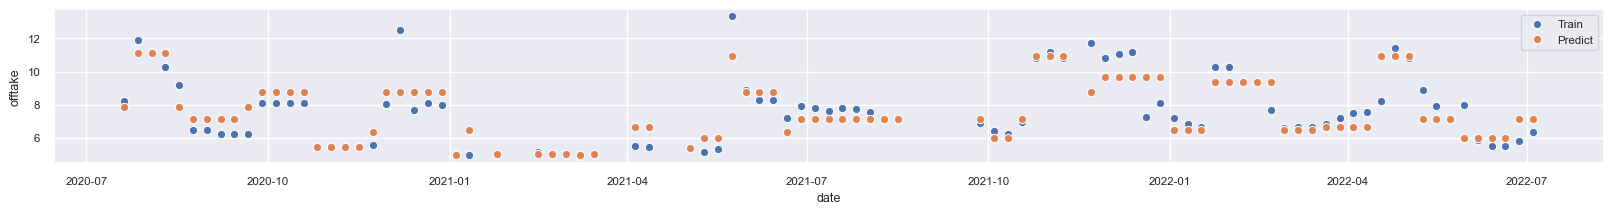

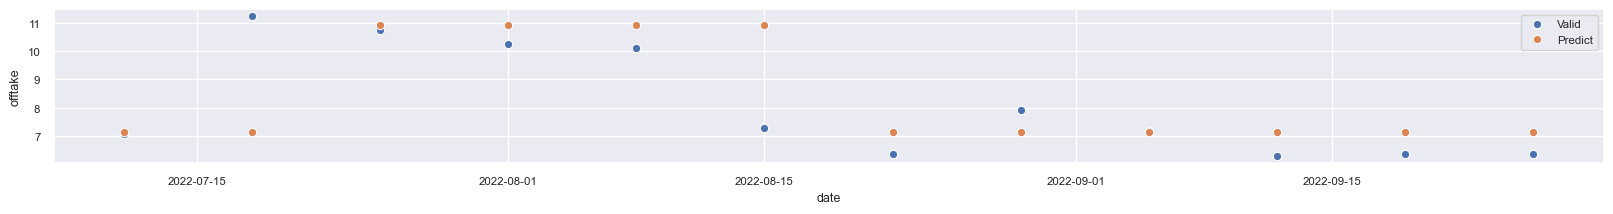

In [77]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=train, x="date", y="tree_param_grid", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=valid, x="date", y="tree_param_grid", marker='o', linestyle='')
plt.legend(["Valid", "Predict"])

### 3.4 **RandomForestRegressor** + Validation (Timeseriessplit) + more param 

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
clf_rand = RandomForestRegressor(random_state=2022)

In [80]:
param_grid = {
    'bootstrap': [True, False],
    'n_estimators': [100],
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ["auto", "sqrt", "log2"]}

In [81]:
grid = GridSearchCV(estimator=clf_rand, 
                    param_grid=param_grid, 
                    scoring="neg_mean_squared_error", 
                    cv=cv_ls,
                    n_jobs=-1)

grid.fit(X_train_std, y_train)

GridSearchCV(cv=[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]),
                  array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49])),
                 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                  array([50, 51, 52, 53, 54, 5...
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
                  array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89]))],
             estimator=RandomForestRegressor(random_state=2022), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2,

In [82]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

-3.0924671482375734
RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=10,
                      random_state=2022)
{'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [83]:
opt_clf_rand = RandomForestRegressor(random_state=2022, bootstrap= True, min_samples_leaf = 1, n_estimators= 100, max_depth=5, max_features='sqrt', min_samples_split=10)
opt_clf_rand.fit(X_train_std, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=10,
                      random_state=2022)

In [84]:
y_train_opt_clf_rand = opt_clf_rand.predict(X_train_std)
y_val_opt_clf_rand = opt_clf_rand.predict(X_val_std)

In [85]:
print("R-Square Train: ", r2_score(y_train, y_train_opt_clf_rand))
print("R-Square Validation: ", r2_score(y_val, y_val_opt_clf_rand))
print("="*50)
print("MAE Train: ", mean_absolute_error(y_train, y_train_opt_clf_rand))
print("MAE Validation: ", mean_absolute_error(y_val, y_val_opt_clf_rand))
print("="*50)

R-Square Train:  0.702823635782812
R-Square Validation:  0.24803601359659344
MAE Train:  0.8701108872098444
MAE Validation:  0.9471507605784861


In [86]:
train["rand_param_grid"] = y_train_opt_clf_rand
valid["rand_param_grid"] = y_val_opt_clf_rand

C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\857568531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["rand_param_grid"] = y_train_opt_clf_rand
C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\857568531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["rand_param_grid"] = y_val_opt_clf_rand


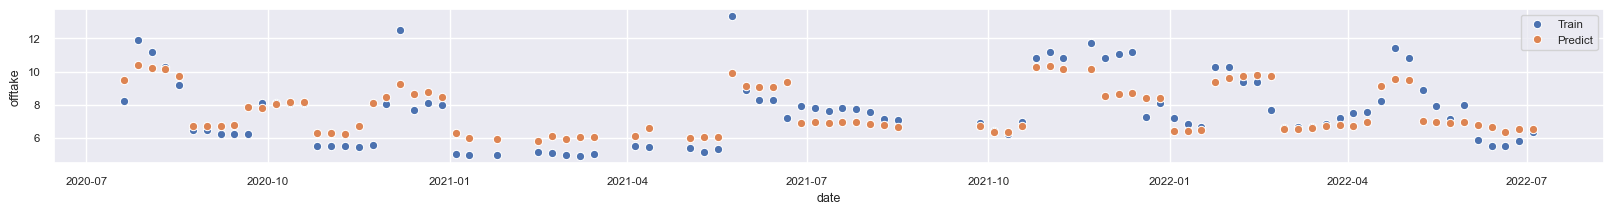

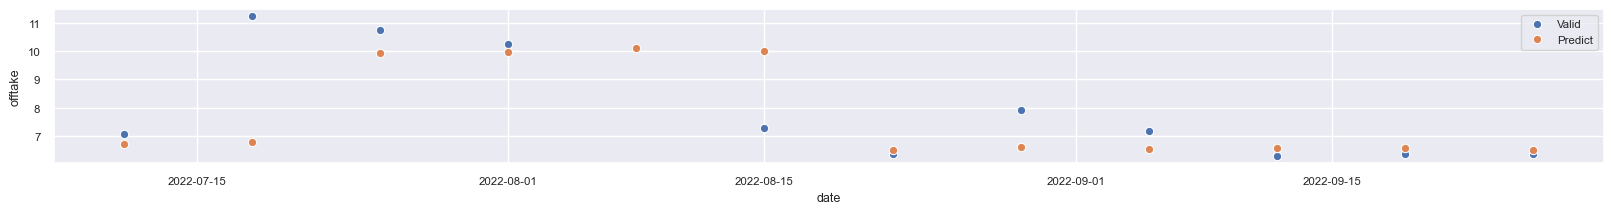

In [87]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=train, x="date", y="rand_param_grid", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=valid, x="date", y="rand_param_grid", marker='o', linestyle='')
plt.legend(["Valid", "Predict"])

### 3.5 **xgboost** + Validation (Timeseriessplit) + more param 

In [88]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [89]:
from xgboost import XGBRegressor

In [90]:
clf_xgb = XGBRegressor(random_state=2022)

In [91]:
param_grid = {
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'colsample_bytree': np.arange(0.4, 1.0),
    'n_estimators': [100, 500, 1000]
}

In [92]:
grid = GridSearchCV(estimator=clf_xgb, 
                    param_grid=param_grid, 
                    scoring="neg_mean_squared_error", 
                    cv=cv_ls,
                    n_jobs=-1)

grid.fit(X_train_std, y_train)

GridSearchCV(cv=[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]),
                  array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49])),
                 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                  array([50, 51, 52, 53, 54, 5...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=2022, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree':

In [93]:
print(grid.best_score_)
print(grid.best_params_)

-3.003915551866721
{'colsample_bytree': 0.4, 'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 100}


In [94]:
opt_clf_xgb = XGBRegressor(max_depth=3, learning_rate=0.1, colsample_bytree=0.4, n_estimators=100)
opt_clf_xgb.fit(X_train_std, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [96]:
y_train_opt_clf_xgb = opt_clf_xgb.predict(X_train_std)
y_val_opt_clf_xgb = opt_clf_xgb.predict(X_val_std)

In [97]:
print("R-Square Train: ", r2_score(y_train, y_train_opt_clf_xgb))
print("R-Square Validation: ", r2_score(y_val, y_val_opt_clf_xgb))
print("="*50)
print("MAE Train: ", mean_absolute_error(y_train, y_train_opt_clf_xgb))
print("MAE Validation: ", mean_absolute_error(y_val, y_val_opt_clf_xgb))
print("="*50)

R-Square Train:  0.9482960588102414
R-Square Validation:  0.33690747099982477
MAE Train:  0.3540340010325114
MAE Validation:  0.8657017437616984


In [98]:
train["xbg_param_grid"] = y_train_opt_clf_xgb
valid["xbg_param_grid"] = y_val_opt_clf_xgb

C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\3659716541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["xbg_param_grid"] = y_train_opt_clf_xgb
C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\3659716541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["xbg_param_grid"] = y_val_opt_clf_xgb


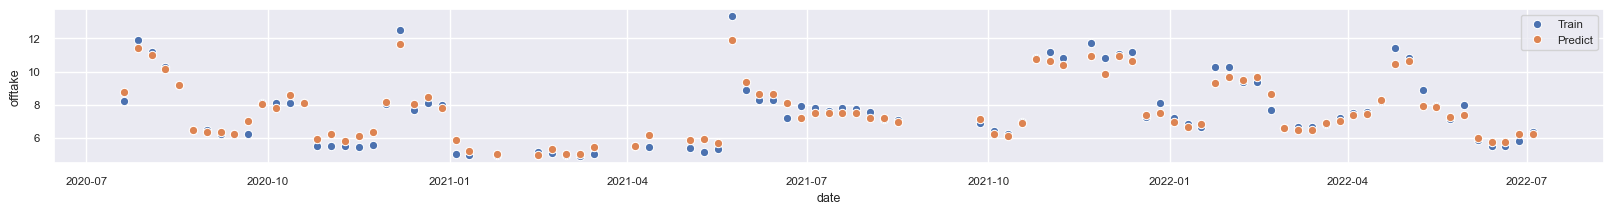

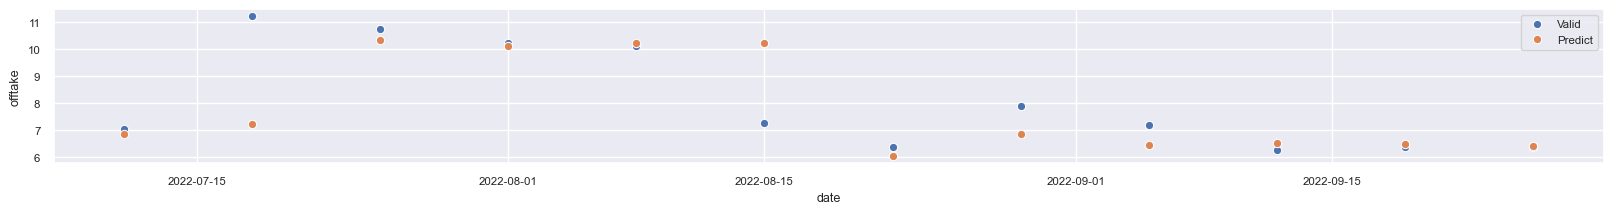

In [99]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=train, x="date", y="xbg_param_grid", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=valid, x="date", y="xbg_param_grid", marker='o', linestyle='')
plt.legend(["Valid", "Predict"])

## feature_importances

In [100]:
feature_import = opt_clf_xgb.feature_importances_
feature_import = pd.Series(feature_import, features_columns).sort_values(ascending= True)

In [101]:
feature_import

stores          0.063575
sales_in        0.071833
week_of_year    0.072008
pro_3for        0.084243
pro_2for        0.347519
RSP             0.360823
dtype: float32

<AxesSubplot: >

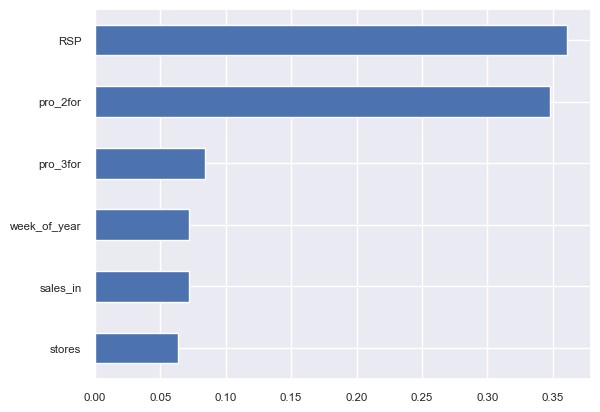

In [102]:
feature_import.plot(kind= 'barh')

# Predict on unseen data (test-set)

### 1. import test-set and manipulate as train-set

In [103]:
test_path = 'Offtake_regression_input/offtake_regression_test.csv'
df_test = pd.read_csv(test_path)

df_test.head()

,date,sales_in,stores,pro,offtake
0,10/3/2022,124,7159,RSP,6.66
1,10/10/2022,2068,7478,RSP,7.05
2,10/17/2022,465,11451,RSP,7.29
3,10/24/2022,0,11835,2for,8.63
4,10/31/2022,0,11733,2for,9.41


In [104]:
print(df_train.shape ,df_test.shape)

(102, 12) (10, 5)


In [105]:
df_test

,date,sales_in,stores,pro,offtake
0,10/3/2022,124,7159,RSP,6.66
1,10/10/2022,2068,7478,RSP,7.05
2,10/17/2022,465,11451,RSP,7.29
3,10/24/2022,0,11835,2for,8.63
4,10/31/2022,0,11733,2for,9.41
5,11/7/2022,71,10994,RSP,6.44
6,11/14/2022,214,10962,RSP,6.37
7,11/21/2022,477,10581,RSP,6.32
8,11/28/2022,615,14811,BOGO,19.93
9,12/5/2022,348,10386,BOGO,9.67


In [106]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['week_of_year'] = df_test['date'].dt.week

C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\2630070787.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_test['week_of_year'] = df_test['date'].dt.week


In [107]:
df_test['pro'].unique()

array(['RSP', '2for', 'BOGO'], dtype=object)

In [108]:
df_test = df_test[df_test['pro'].isin(['RSP', '2for', 'point', '2nd_haft','3for'])]

In [109]:
dummies = df_test[['pro']]
dummies_col = dummies.columns

In [110]:
dummies_col

Index(['pro'], dtype='object')

In [111]:
df_test = pd.get_dummies(df_test, columns = dummies_col)

In [112]:
df_test = df_test[['date','year','month','week_of_year','sales_in','stores','pro_2for','pro_RSP','offtake']]

In [113]:
df_test = df_test.rename(columns = {'pro_RSP' : 'RSP'})

In [114]:
df_test

,date,year,month,week_of_year,sales_in,stores,pro_2for,RSP,offtake
0,2022-10-03,2022,10,40,124,7159,0,1,6.66
1,2022-10-10,2022,10,41,2068,7478,0,1,7.05
2,2022-10-17,2022,10,42,465,11451,0,1,7.29
3,2022-10-24,2022,10,43,0,11835,1,0,8.63
4,2022-10-31,2022,10,44,0,11733,1,0,9.41
5,2022-11-07,2022,11,45,71,10994,0,1,6.44
6,2022-11-14,2022,11,46,214,10962,0,1,6.37
7,2022-11-21,2022,11,47,477,10581,0,1,6.32


In [115]:
features_columns

['week_of_year', 'sales_in', 'stores', 'pro_2for', 'pro_3for', 'RSP']

In [116]:
df_test['pro_3for'] = 0

In [117]:
df_test = df_test[['date','year','month','week_of_year','sales_in','stores','pro_2for','pro_3for','RSP','offtake']]

In [118]:
X_test = df_test[features_columns].values
y_test = df_test["offtake"].tolist()

In [119]:
X_test

array([[   40,   124,  7159,     0,     0,     1],
       [   41,  2068,  7478,     0,     0,     1],
       [   42,   465, 11451,     0,     0,     1],
       [   43,     0, 11835,     1,     0,     0],
       [   44,     0, 11733,     1,     0,     0],
       [   45,    71, 10994,     0,     0,     1],
       [   46,   214, 10962,     0,     0,     1],
       [   47,   477, 10581,     0,     0,     1]], dtype=int64)

In [120]:
y_test

[6.66, 7.05, 7.29, 8.63, 9.41, 6.44, 6.37, 6.32]

In [121]:
X_test_norm = norm.transform(X_test)
X_test_std = stand.transform(X_test_norm)

C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


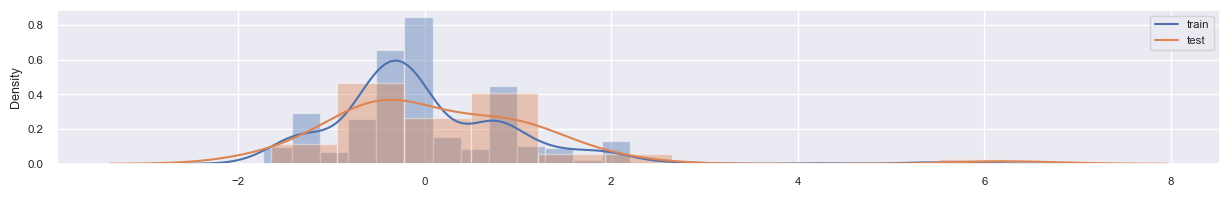

In [122]:
plt.figure(figsize=(15, 2));
sns.distplot(X_train_std);
sns.distplot(X_test_std);
plt.legend(["train", "test"])

### Model selected

#### 1. Randonforest

In [123]:
y_train_opt_clf_rand = opt_clf_rand.predict(X_train_std)
y_test_opt_clf_rand = opt_clf_rand.predict(X_test_std)

In [124]:
print("R-Square Train: ", r2_score(y_train, y_train_opt_clf_rand))
print("R-Square Test: ", r2_score(y_test, y_test_opt_clf_rand))
print("="*50)
print("MAE Train: ", mean_absolute_error(y_train, y_train_opt_clf_rand))
print("MAE Test: ", mean_absolute_error(y_test, y_test_opt_clf_rand))
print("="*50)

R-Square Train:  0.702823635782812
R-Square Test:  0.6352159664798409
MAE Train:  0.8701108872098444
MAE Test:  0.5752121025616356


In [125]:
train["rand_param_grid"] = y_train_opt_clf_rand
df_test["rand_param_grid_test"] = y_test_opt_clf_rand

C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\2783762836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["rand_param_grid"] = y_train_opt_clf_rand
C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\2783762836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["rand_param_grid_test"] = y_test_opt_clf_rand


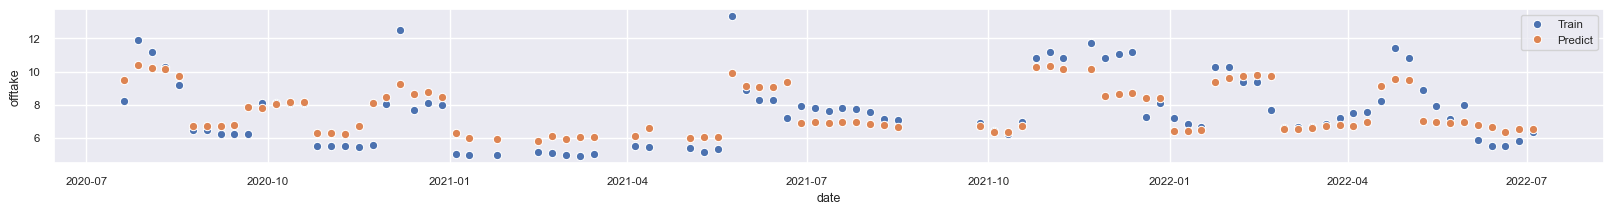

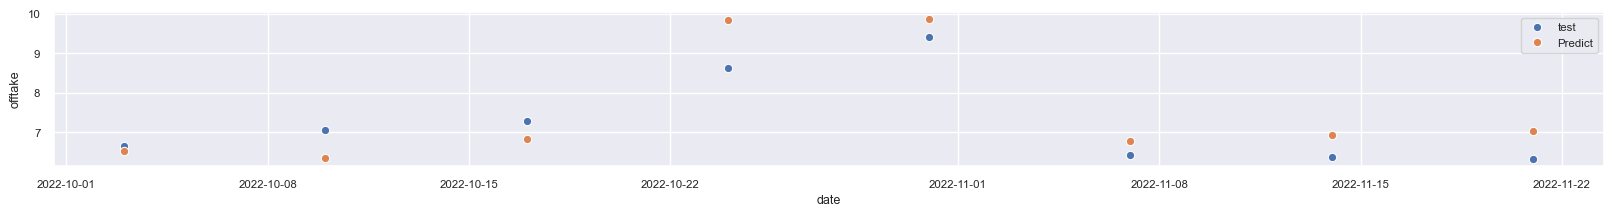

In [126]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=train, x="date", y="rand_param_grid", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=df_test, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=df_test, x="date", y="rand_param_grid_test", marker='o', linestyle='')
plt.legend(["test", "Predict"])

In [127]:
df_test

,date,year,month,week_of_year,sales_in,stores,pro_2for,pro_3for,RSP,offtake,rand_param_grid_test
0,2022-10-03,2022,10,40,124,7159,0,0,1,6.66,6.528093
1,2022-10-10,2022,10,41,2068,7478,0,0,1,7.05,6.339493
2,2022-10-17,2022,10,42,465,11451,0,0,1,7.29,6.819715
3,2022-10-24,2022,10,43,0,11835,1,0,0,8.63,9.845289
4,2022-10-31,2022,10,44,0,11733,1,0,0,9.41,9.861681
5,2022-11-07,2022,11,45,71,10994,0,0,1,6.44,6.780907
6,2022-11-14,2022,11,46,214,10962,0,0,1,6.37,6.928063
7,2022-11-21,2022,11,47,477,10581,0,0,1,6.32,7.043058


#### 2. Xgboost

In [128]:
y_train_opt_clf_xgb = opt_clf_xgb.predict(X_train_std)
y_test_opt_clf_xgb = opt_clf_xgb.predict(X_test_std)

In [129]:
print("R-Square Train: ", r2_score(y_train, y_train_opt_clf_xgb))
print("R-Square Test: ", r2_score(y_test, y_test_opt_clf_xgb))
print("="*50)
print("MAE Train: ", mean_absolute_error(y_train, y_train_opt_clf_xgb))
print("MAE Test: ", mean_absolute_error(y_test, y_test_opt_clf_xgb))
print("="*50)

R-Square Train:  0.9482960588102414
R-Square Test:  0.5899097681239627
MAE Train:  0.3540340010325114
MAE Test:  0.5994762873649595


In [130]:
train["xbg_param_grid"] = y_train_opt_clf_xgb
df_test["xbg_param_grid_test"] = y_test_opt_clf_xgb

C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\1256883372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["xbg_param_grid"] = y_train_opt_clf_xgb
C:\Users\Mos\AppData\Local\Temp\ipykernel_14468\1256883372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["xbg_param_grid_test"] = y_test_opt_clf_xgb


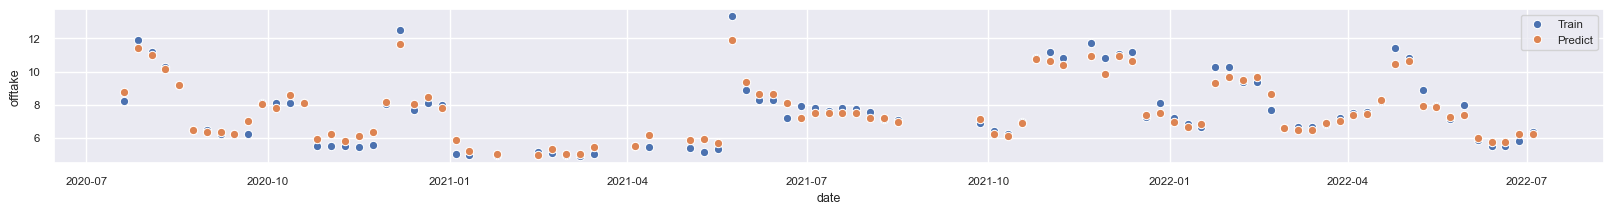

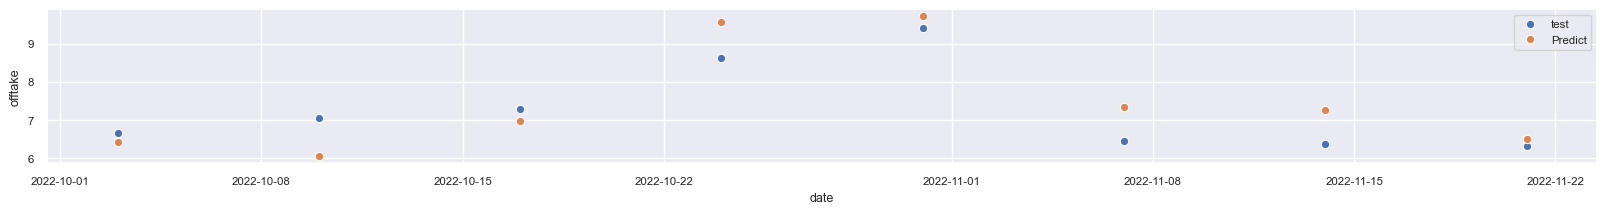

In [131]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=train, x="date", y="xbg_param_grid", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=df_test, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=df_test, x="date", y="xbg_param_grid_test", marker='o', linestyle='')
plt.legend(["test", "Predict"])

In [132]:
df_test

,date,year,month,week_of_year,sales_in,stores,pro_2for,pro_3for,RSP,offtake,rand_param_grid_test,xbg_param_grid_test
0,2022-10-03,2022,10,40,124,7159,0,0,1,6.66,6.528093,6.421833
1,2022-10-10,2022,10,41,2068,7478,0,0,1,7.05,6.339493,6.043445
2,2022-10-17,2022,10,42,465,11451,0,0,1,7.29,6.819715,6.958333
3,2022-10-24,2022,10,43,0,11835,1,0,0,8.63,9.845289,9.580251
4,2022-10-31,2022,10,44,0,11733,1,0,0,9.41,9.861681,9.718980
5,2022-11-07,2022,11,45,71,10994,0,0,1,6.44,6.780907,7.342857
6,2022-11-14,2022,11,46,214,10962,0,0,1,6.37,6.928063,7.246152
7,2022-11-21,2022,11,47,477,10581,0,0,1,6.32,7.043058,6.501181
